In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [416]:
rain_data=pd.read_csv('data/rain_data_aus.csv')
rain_data

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195


In [417]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [418]:
rain_data.isnull().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [419]:
rain_data_dummies=pd.get_dummies(rain_data, columns = ['raintoday','raintomorrow'])
rain_data_dummies

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,raintoday_No,raintoday_Yes,raintomorrow_No,raintomorrow_Yes
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,0.0,29.48,28.400000,12,5.115360,0.089825,1,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,0.0,32.12,2.208569,10,21.497100,0.023477,1,0,1,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,0.0,32.84,38.000000,17,20.782859,0.027580,1,0,1,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,1.0,35.60,21.200000,8,12.028646,0.023962,1,0,1,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,0.2,40.76,41.600000,9,11.883546,0.220164,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,0.0,28.16,34.400000,12,5.848681,0.002556,1,0,1,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,0.0,30.08,30.800000,10,6.653879,0.002053,1,0,1,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,0.0,32.36,27.200000,9,19.715976,0.023350,1,0,1,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,0.0,34.28,30.800000,12,0.985551,0.007195,1,0,1,0


In [420]:
wind_data=pd.concat(
    [pd.read_csv('data/wind_table_01.csv'),pd.read_csv('data/wind_table_02.csv'),pd.read_csv('data/wind_table_03.csv'),pd.read_csv('data/wind_table_04.csv'),
    pd.read_csv('data/wind_table_05.csv'),pd.read_csv('data/wind_table_06.csv'),pd.read_csv('data/wind_table_07.csv'),pd.read_csv('data/wind_table_08.csv')])

In [421]:
wind_data

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,NaN,NaN,NaN,NaN,NaN,NaN,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,NaN,NaN,NaN,NaN,NaN,NaN,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NaN,NaN,NaN,NaN,NaN,NaN,NW,50.0,NNW,NNW,17.0,28.0


In [422]:
wind_data['wind_gustdir']=np.where(wind_data['wind_gustdir'].isnull()==True,wind_data['windgustdir'],wind_data['wind_gustdir'])
wind_data['wind_gustspeed']=np.where(wind_data['wind_gustspeed'].isnull()==True,wind_data['windgustspeed'],wind_data['wind_gustspeed'])
wind_data['wind_dir9am']=np.where(wind_data['wind_dir9am'].isnull()==True,wind_data['winddir9am'],wind_data['wind_dir9am'])
wind_data['wind_dir3pm']=np.where(wind_data['wind_dir3pm'].isnull()==True,wind_data['winddir3pm'],wind_data['wind_dir3pm'])
wind_data['wind_speed9am']=np.where(wind_data['wind_speed9am'].isnull()==True,wind_data['windspeed9am'],wind_data['wind_speed9am'])
wind_data['wind_speed3pm']=np.where(wind_data['wind_speed3pm'].isnull()==True,wind_data['windspeed3pm'],wind_data['wind_speed3pm'])


In [423]:
wind_data.isnull().sum()

date                  0
location              0
wind_gustdir      10578
wind_gustspeed    10518
wind_dir9am       11428
wind_dir3pm        4835
wind_speed9am      1453
wind_speed3pm      3583
windgustdir       46997
windgustspeed     46944
winddir9am        48360
winddir3pm        43825
windspeed9am      40753
windspeed3pm      42911
dtype: int64

In [424]:
wind_data=wind_data[['date','location','wind_gustdir','wind_gustspeed','wind_dir9am','wind_dir3pm','wind_speed9am','wind_speed3pm']]
wind_data

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NW,50.0,NNW,NNW,17.0,28.0


In [425]:
wind_data.isnull().sum()

date                  0
location              0
wind_gustdir      10578
wind_gustspeed    10518
wind_dir9am       11428
wind_dir3pm        4835
wind_speed9am      1453
wind_speed3pm      3583
dtype: int64

In [426]:
wind_data.loc[wind_data['wind_gustdir'].isnull()==1,:]

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
92,2008-02-01,Sydney,NaN,NaN,S,SSW,17.0,20.0
94,2008-02-02,Sydney,NaN,NaN,W,E,9.0,13.0
96,2008-02-03,Sydney,NaN,NaN,ESE,ESE,17.0,2.0
98,2008-02-04,Sydney,NaN,NaN,NNE,E,22.0,20.0
100,2008-02-05,Sydney,NaN,NaN,NNE,W,11.0,6.0
...,...,...,...,...,...,...,...,...
22110,2017-06-24,Newcastle,NaN,NaN,NW,NaN,9.0,NaN
22125,2017-06-24,Sale,NaN,NaN,WSW,W,13.0,19.0
22141,2017-06-24,Albany,NaN,NaN,SE,NaN,11.0,NaN
22172,2017-06-25,Sale,NaN,NaN,WNW,NW,6.0,31.0


In [427]:
wind_dummies=pd.get_dummies(wind_data[['wind_gustdir','wind_gustspeed','wind_dir9am','wind_dir3pm','wind_speed9am','wind_speed3pm']])
wind_dummies

,wind_gustspeed,wind_speed9am,wind_speed3pm,wind_gustdir_E,wind_gustdir_ENE,wind_gustdir_ESE,wind_gustdir_N,wind_gustdir_NE,wind_gustdir_NNE,wind_gustdir_NNW,...,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
0,30.0,6.0,20.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,39.0,4.0,17.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,85.0,6.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54.0,30.0,24.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,50.0,20.0,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,26.0,4.0,11.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22189,15.0,7.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22190,20.0,6.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22191,50.0,17.0,28.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [428]:
wind_data[['date','location']]

,date,location
0,2007-11-01,Canberra
1,2007-11-02,Canberra
2,2007-11-03,Canberra
3,2007-11-04,Canberra
4,2007-11-05,Canberra
...,...,...
22188,2017-06-25,Perth
22189,2017-06-25,SalmonGums
22190,2017-06-25,Walpole
22191,2017-06-25,Hobart


In [429]:
wind_data_dummies=pd.concat([wind_data[['date','location']],wind_dummies], axis=1)
wind_data_dummies

,date,location,wind_gustspeed,wind_speed9am,wind_speed3pm,wind_gustdir_E,wind_gustdir_ENE,wind_gustdir_ESE,wind_gustdir_N,wind_gustdir_NE,...,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
0,2007-11-01,Canberra,30.0,6.0,20.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2007-11-02,Canberra,39.0,4.0,17.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2007-11-03,Canberra,85.0,6.0,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007-11-04,Canberra,54.0,30.0,24.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2007-11-05,Canberra,50.0,20.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,26.0,4.0,11.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22189,2017-06-25,SalmonGums,15.0,7.0,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22190,2017-06-25,Walpole,20.0,6.0,6.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22191,2017-06-25,Hobart,50.0,17.0,28.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [430]:
df= pd.merge(left=rain_data_dummies, right=wind_data_dummies, on=['date','location'])
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,0,0,0,0,0,0,0,0,0,0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,0,0,0,0,0,0,0,0,1,0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,0,0,0,0,0,0,0,0,1,0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,0,0,0,0,0,0,0,0,0,0


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 76 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              164386 non-null  object 
 1   location          164386 non-null  object 
 2   mintemp           163614 non-null  float64
 3   maxtemp           163989 non-null  float64
 4   rainfall          162767 non-null  float64
 5   evaporation       90128 non-null   float64
 6   sunshine          80607 non-null   float64
 7   humidity9am       162352 non-null  float64
 8   humidity3pm       159262 non-null  float64
 9   pressure9am       148085 non-null  float64
 10  pressure3pm       148113 non-null  float64
 11  cloud9am          100879 non-null  float64
 12  cloud3pm          95716 non-null   float64
 13  temp9am           163410 non-null  float64
 14  temp3pm           160309 non-null  float64
 15  amountOfRain      164386 non-null  float64
 16  temp              16

In [432]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'raintoday_No', 'raintoday_Yes', 'raintomorrow_No', 'raintomorrow_Yes',
       'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm', 'wind_gustdir_E',
       'wind_gustdir_ENE', 'wind_gustdir_ESE', 'wind_gustdir_N',
       'wind_gustdir_NE', 'wind_gustdir_NNE', 'wind_gustdir_NNW',
       'wind_gustdir_NW', 'wind_gustdir_S', 'wind_gustdir_SE',
       'wind_gustdir_SSE', 'wind_gustdir_SSW', 'wind_gustdir_SW',
       'wind_gustdir_W', 'wind_gustdir_WNW', 'wind_gustdir_WSW',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_di

In [433]:
df[[ 'raintomorrow_Yes','wind_gustdir_E',
       'wind_gustdir_ENE', 'wind_gustdir_ESE', 'wind_gustdir_N',
       'wind_gustdir_NE', 'wind_gustdir_NNE', 'wind_gustdir_NNW',
       'wind_gustdir_NW', 'wind_gustdir_S', 'wind_gustdir_SE',
       'wind_gustdir_SSE', 'wind_gustdir_SSW', 'wind_gustdir_SW',
       'wind_gustdir_W', 'wind_gustdir_WNW', 'wind_gustdir_WSW',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW']].corr()[['raintomorrow_Yes']]

,raintomorrow_Yes
raintomorrow_Yes,1.000000
wind_gustdir_E,-0.047820
wind_gustdir_ENE,-0.036799
wind_gustdir_ESE,-0.033718
wind_gustdir_N,0.032113
wind_gustdir_NE,-0.021376
wind_gustdir_NNE,0.004842
wind_gustdir_NNW,0.032602
wind_gustdir_NW,0.034825
wind_gustdir_S,0.000374


In [434]:
df=df[['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'raintoday_Yes', 'raintomorrow_Yes',
       'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm']]
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,0.0,29.48,28.400000,12,5.115360,0,0,44.0,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,0.0,32.12,2.208569,10,21.497100,0,0,44.0,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,0.0,32.84,38.000000,17,20.782859,0,0,46.0,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,1.0,35.60,21.200000,8,12.028646,0,0,24.0,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,0.2,40.76,41.600000,9,11.883546,0,0,41.0,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,0.0,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,0.0,34.40,30.800000,15,4.381481,0,0,28.0,13.0,7.0


In [435]:
df['location'].value_counts()

Canberra            3877
Sydney              3798
Perth               3655
Darwin              3653
Hobart              3650
Brisbane            3618
Adelaide            3549
Bendigo             3491
Townsville          3489
Ballarat            3489
Launceston          3486
AliceSprings        3484
MountGambier        3482
PerthAirport        3471
MelbourneAirport    3470
Mildura             3468
Albury              3467
Albany              3463
SydneyAirport       3463
Nuriootpa           3461
Sale                3457
Portland            3456
Watsonia            3455
Tuggeranong         3455
Woomera             3442
Cobar               3437
Wollongong          3434
GoldCoast           3423
CoffsHarbour        3414
Penrith             3414
SalmonGums          3414
Richmond            3411
Witchcliffe         3408
WaggaWagga          3404
Dartmoor            3404
Cairns              3402
Newcastle           3402
NorahHead           3390
NorfolkIsland       3382
BadgerysCreek       3371


In [436]:
df['date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
164381    2017-06-22
164382    2017-06-23
164383    2017-06-23
164384    2017-06-24
164385    2017-06-24
Name: date, Length: 164386, dtype: object

In [437]:
df['date']=pd.to_datetime(df['date'])

In [438]:
df['date'].dt.month>=3

0         True
1         True
2         True
3         True
4         True
          ... 
164381    True
164382    True
164383    True
164384    True
164385    True
Name: date, Length: 164386, dtype: bool

In [439]:
df.loc[(df['date'].dt.month>=3) & (df['date'].dt.month<=5),'season']=1 #fall
df.loc[(df['date'].dt.month>=6) & (df['date'].dt.month<=8),'season']=2 #winter
df.loc[(df['date'].dt.month>=9) & (df['date'].dt.month<=11),'season']=3 #spring
df.loc[(df['date'].dt.month==12) | (df['date'].dt.month==1) | (df['date'].dt.month==2),'season']=4 #summer

In [440]:
df['season'].value_counts()

1.0    45273
2.0    41616
3.0    38987
4.0    38510
Name: season, dtype: int64

In [441]:
df.corr().sort_values(by='raintomorrow_Yes', ascending=False)

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
raintomorrow_Yes,0.082160,-0.159619,0.236737,-0.115059,-0.449267,0.254240,0.446000,-0.249101,-0.230104,0.312676,...,-0.125842,0.404637,0.003300,-0.008062,0.302914,1.000000,0.237028,0.094347,0.091011,-0.022496
amountOfRain,0.122942,-0.045593,0.303773,-0.042171,-0.294534,0.171360,0.313626,-0.164449,-0.166430,0.195088,...,-0.035244,0.286863,-0.001813,-0.003727,0.213118,0.503865,0.165221,0.070888,0.051047,0.012083
humidity3pm,0.003666,-0.509997,0.255196,-0.381699,-0.628718,0.666595,1.000000,-0.028273,0.049431,0.513534,...,-0.405729,0.908273,-0.001739,0.000303,0.375366,0.446000,-0.021825,-0.028114,0.017173,-0.128274
humidity,0.002087,-0.464360,0.232368,-0.345545,-0.570546,0.605826,0.908273,-0.025724,0.044955,0.466098,...,-0.370119,1.000000,-0.001283,-0.000599,0.342373,0.404637,-0.017787,-0.025547,0.017357,-0.114619
cloud3pm,0.010092,-0.286156,0.168549,-0.178609,-0.704732,0.356169,0.523137,-0.143914,-0.082297,0.597971,...,-0.224768,0.474175,0.001077,-0.005822,0.265525,0.377591,0.107754,0.054320,0.026873,-0.049086
cloud9am,0.068873,-0.292238,0.195781,-0.174794,-0.674158,0.449192,0.513534,-0.128201,-0.060596,1.000000,...,-0.229026,0.466098,-0.001369,0.000789,0.299644,0.312676,0.071378,0.024703,0.052480,-0.000095
raintoday_Yes,0.054232,-0.229225,0.503043,-0.180200,-0.326252,0.350088,0.375366,-0.192143,-0.108712,0.299644,...,-0.183122,0.342373,-0.002789,0.000587,1.000000,0.302914,0.158828,0.103971,0.081962,-0.023472
humidity9am,-0.235865,-0.504564,0.222845,-0.494966,-0.490687,1.000000,0.666595,0.142541,0.189014,0.449192,...,-0.400059,0.605826,-0.002972,0.002261,0.350088,0.254240,-0.212128,-0.268539,-0.144068,-0.227920
wind_gustspeed,0.174876,0.063016,0.138270,0.197295,-0.033446,-0.212128,-0.021825,-0.464323,-0.418922,0.071378,...,0.051955,-0.017787,0.002150,0.000201,0.158828,0.237028,1.000000,0.606200,0.688512,0.174756
rainfall,0.102945,-0.077392,1.000000,-0.056917,-0.226304,0.222845,0.255196,-0.170994,-0.129281,0.195781,...,-0.063146,0.232368,-0.001534,-0.004061,0.503043,0.236737,0.138270,0.089341,0.061503,0.009274


In [442]:
df.corr()[['raintomorrow_Yes']].sort_values(by='raintomorrow_Yes',ascending=False)

,raintomorrow_Yes
raintomorrow_Yes,1.000000
amountOfRain,0.503865
humidity3pm,0.446000
humidity,0.404637
cloud3pm,0.377591
cloud9am,0.312676
raintoday_Yes,0.302914
humidity9am,0.254240
wind_gustspeed,0.237028
rainfall,0.236737


In [443]:
df.corr()[['raintomorrow_Yes']].sort_values(by='raintomorrow_Yes',ascending=True)

,raintomorrow_Yes
sunshine,-0.449267
pressure9am,-0.249101
pressure3pm,-0.230104
temp3pm,-0.193129
maxtemp,-0.159619
temp,-0.125842
evaporation,-0.115059
temp9am,-0.026293
season,-0.022496
precipitation9am,-0.008062


<AxesSubplot:>

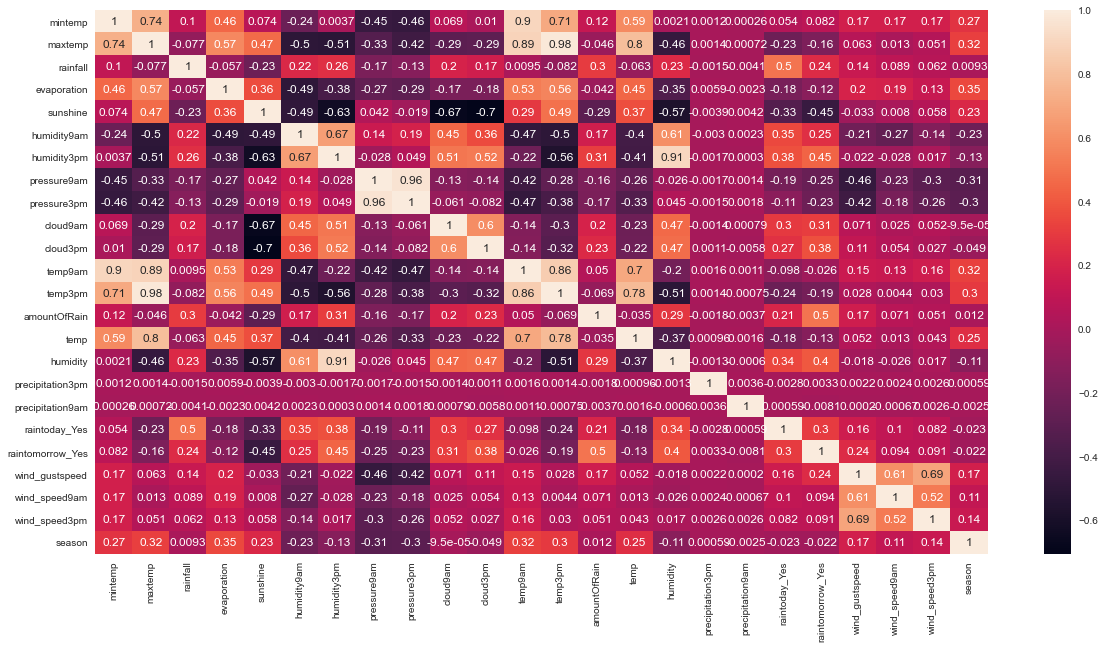

In [444]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [445]:
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,29.48,28.400000,12,5.115360,0,0,44.0,20.0,24.0,4.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,32.12,2.208569,10,21.497100,0,0,44.0,4.0,22.0,4.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,32.84,38.000000,17,20.782859,0,0,46.0,19.0,26.0,4.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,35.60,21.200000,8,12.028646,0,0,24.0,11.0,9.0,4.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,40.76,41.600000,9,11.883546,0,0,41.0,7.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0,2.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,34.40,30.800000,15,4.381481,0,0,28.0,13.0,7.0,2.0


In [446]:
df.isnull().sum()

date                    0
location                0
mintemp               772
maxtemp               397
rainfall             1619
evaporation         74258
sunshine            83779
humidity9am          2034
humidity3pm          5124
pressure9am         16301
pressure3pm         16273
cloud9am            63507
cloud3pm            68670
temp9am               976
temp3pm              4077
amountOfRain            0
temp                  397
humidity             5124
precipitation3pm        0
precipitation9am        0
raintoday_Yes           0
raintomorrow_Yes        0
wind_gustspeed      10518
wind_speed9am        1453
wind_speed3pm        3583
season                  0
dtype: int64

In [447]:
df['sunshine'].isnull().sum()

83779

In [448]:
df['evaporation'].isnull().sum()

74258

In [449]:
df['cloud9am'].isnull().sum()

63507

In [450]:
df.loc[df['cloud9am'].isnull()==True,:]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,32.12,2.208569,10,21.497100,0,0,44.0,4.0,22.0,4.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,32.84,38.000000,17,20.782859,0,0,46.0,19.0,26.0,4.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,35.60,21.200000,8,12.028646,0,0,24.0,11.0,9.0,4.0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,55.0,23.0,1009.2,...,37.64,29.600000,8,17.320994,0,0,56.0,19.0,24.0,4.0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,48.0,19.0,1013.4,...,34.04,24.800000,7,7.207085,0,0,35.0,6.0,17.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164379,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,30.08,30.800000,10,6.653879,0,0,31.0,13.0,11.0,2.0
164380,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0,2.0
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0,2.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0


In [451]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'raintoday_Yes',
       'raintomorrow_Yes', 'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm',
       'season'],
      dtype='object')

In [452]:
df=df[['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'raintoday_Yes',
       'raintomorrow_Yes', 'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm',
       'season']]

In [453]:
df

,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,29.48,28.400000,12,5.115360,0,0,44.0,20.0,24.0,4.0
1,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,32.12,2.208569,10,21.497100,0,0,44.0,4.0,22.0,4.0
2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,32.84,38.000000,17,20.782859,0,0,46.0,19.0,26.0,4.0
3,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,35.60,21.200000,8,12.028646,0,0,24.0,11.0,9.0,4.0
4,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,40.76,41.600000,9,11.883546,0,0,41.0,7.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0,2.0
164382,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164383,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164384,7.8,27.0,0.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,34.40,30.800000,15,4.381481,0,0,28.0,13.0,7.0,2.0


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   mintemp           163614 non-null  float64
 1   maxtemp           163989 non-null  float64
 2   rainfall          162767 non-null  float64
 3   humidity9am       162352 non-null  float64
 4   humidity3pm       159262 non-null  float64
 5   pressure9am       148085 non-null  float64
 6   pressure3pm       148113 non-null  float64
 7   temp9am           163410 non-null  float64
 8   temp3pm           160309 non-null  float64
 9   amountOfRain      164386 non-null  float64
 10  temp              163989 non-null  float64
 11  humidity          159262 non-null  float64
 12  precipitation3pm  164386 non-null  int64  
 13  precipitation9am  164386 non-null  float64
 14  raintoday_Yes     164386 non-null  uint8  
 15  raintomorrow_Yes  164386 non-null  uint8  
 16  wind_gustspeed    15

In [455]:
df.isnull().sum()

mintemp               772
maxtemp               397
rainfall             1619
humidity9am          2034
humidity3pm          5124
pressure9am         16301
pressure3pm         16273
temp9am               976
temp3pm              4077
amountOfRain            0
temp                  397
humidity             5124
precipitation3pm        0
precipitation9am        0
raintoday_Yes           0
raintomorrow_Yes        0
wind_gustspeed      10518
wind_speed9am        1453
wind_speed3pm        3583
season                  0
dtype: int64

In [456]:
df=df.dropna(how='any')
df

,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,29.48,28.400000,12,5.115360,0,0,44.0,20.0,24.0,4.0
1,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,32.12,2.208569,10,21.497100,0,0,44.0,4.0,22.0,4.0
2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,32.84,38.000000,17,20.782859,0,0,46.0,19.0,26.0,4.0
3,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,35.60,21.200000,8,12.028646,0,0,24.0,11.0,9.0,4.0
4,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,40.76,41.600000,9,11.883546,0,0,41.0,7.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,32.36,27.200000,9,19.715976,0,0,22.0,13.0,9.0,2.0
164382,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164383,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,34.28,30.800000,12,0.985551,0,0,37.0,9.0,9.0,2.0
164384,7.8,27.0,0.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,34.40,30.800000,15,4.381481,0,0,28.0,13.0,7.0,2.0


In [457]:
df=df.drop_duplicates()

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119590 entries, 0 to 164384
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   mintemp           119590 non-null  float64
 1   maxtemp           119590 non-null  float64
 2   rainfall          119590 non-null  float64
 3   humidity9am       119590 non-null  float64
 4   humidity3pm       119590 non-null  float64
 5   pressure9am       119590 non-null  float64
 6   pressure3pm       119590 non-null  float64
 7   temp9am           119590 non-null  float64
 8   temp3pm           119590 non-null  float64
 9   amountOfRain      119590 non-null  float64
 10  temp              119590 non-null  float64
 11  humidity          119590 non-null  float64
 12  precipitation3pm  119590 non-null  int64  
 13  precipitation9am  119590 non-null  float64
 14  raintoday_Yes     119590 non-null  uint8  
 15  raintomorrow_Yes  119590 non-null  uint8  
 16  wind_gustspeed    11

In [459]:
df=df.drop(['rainfall','amountOfRain'],axis=1)

<AxesSubplot:>

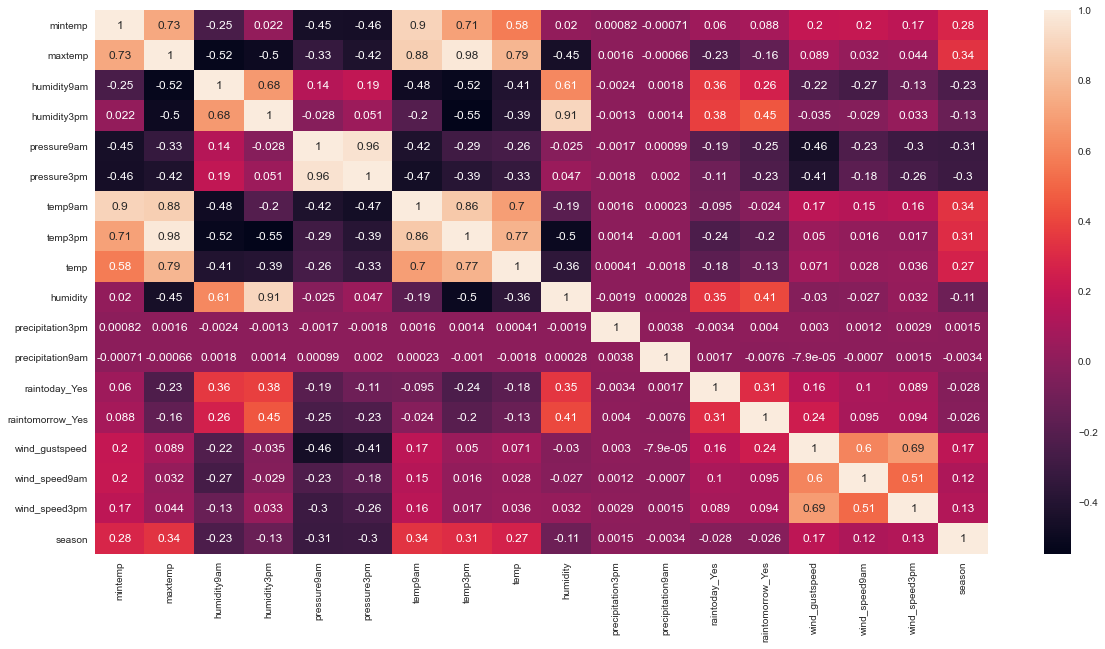

In [460]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

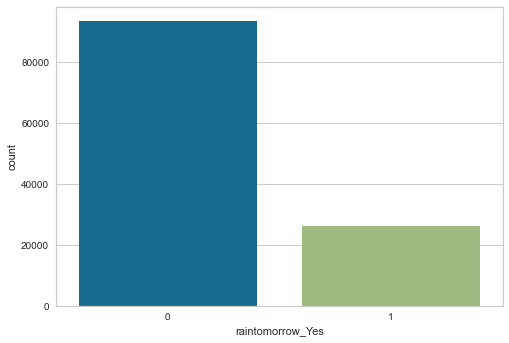

In [466]:
import seaborn as sns
sns.countplot(y);

In [462]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaler

,mintemp,maxtemp,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,raintoday_Yes,raintomorrow_Yes,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,0.159160,-0.083870,0.141680,-1.395059,-1.402514,-1.161493,-0.044318,-0.026148,0.066346,-1.242064,0.623651,-0.978136,-0.532718,-0.529496,0.288757,0.640744,0.566869,1.371238
1,-0.783124,0.231021,-1.269775,-1.250073,-0.993975,-1.061769,0.002198,0.339735,0.326493,-2.231337,-0.006529,2.299352,-0.532718,-0.529496,0.288757,-1.178201,0.336330,1.371238
2,0.080636,0.316900,-1.583432,-1.008431,-1.416602,-0.933553,0.591400,0.178746,0.397443,-0.879464,2.199102,2.156454,-0.532718,-0.529496,0.437128,0.527060,0.797409,1.371238
3,-0.500439,0.646104,-1.217499,-1.685030,-0.007845,-0.349456,0.141745,0.661713,0.669415,-1.514015,-0.636709,0.405002,-0.532718,-0.529496,-1.194956,-0.382412,-1.162178,1.371238
4,0.803054,1.261572,0.716717,-0.863445,-0.965799,-1.318202,0.095229,1.130043,1.177885,-0.743489,-0.321619,0.375972,-0.532718,-0.529496,0.066200,-0.837149,0.105790,1.371238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119585,-1.395608,-0.241315,-0.485634,-1.153416,0.992373,0.847231,-1.207218,-0.157866,-0.063728,-1.015439,0.623651,-0.831421,-0.532718,-0.529496,-0.675656,0.072324,-0.701099,-0.412415
119586,-1.505541,-0.012304,-0.903843,-1.298402,0.978285,0.719015,-1.098681,0.061664,0.125470,-1.151414,-0.006529,-0.670325,-0.532718,-0.529496,-0.675656,-0.155044,-0.931638,-0.412415
119587,-1.379903,0.259647,-0.642462,-1.443388,0.823322,0.548060,-0.974638,0.369006,0.350143,-1.287389,-0.321619,1.943003,-0.532718,-0.529496,-1.343327,-0.155044,-1.162178,-0.412415
119588,-1.097218,0.488659,-0.799290,-1.298402,0.471133,0.220395,-0.726553,0.603171,0.539341,-1.151414,0.623651,-1.804385,-0.532718,-0.529496,-0.230543,-0.609781,-1.162178,-0.412415


In [464]:
X=X.drop_duplicates()

In [465]:
X=df.drop(['raintomorrow_Yes'], axis=1)
y=df['raintomorrow_Yes']

In [467]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [473]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print(cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean())
print(cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=5), scoring='precision').mean())
print(cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=5), scoring='recall').mean())

0.5058086514643676

In [469]:
knn_roc=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_roc.append(cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean())

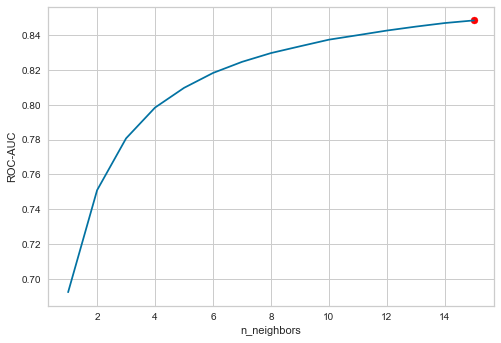

In [470]:
fig, ax = plt.subplots()

x_axis=[i for i in range(1,16)]
plt.plot(x_axis, knn_roc)
plt.xlabel('n_neighbors')
plt.ylabel('ROC-AUC')

ymax = max(knn_roc)
xpos = knn_roc.index(ymax)
xmax = x_axis[xpos]
plt.scatter(xmax,ymax, color='red')

In [471]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=7)
tree.fit(x_train, y_train)
cross_val_score(tree, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean()


0.8525620863596706

In [293]:
tree_roc=[]
for i in range(1,16):
    tree=DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train, y_train)
    tree_roc.append(cross_val_score(tree, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean())

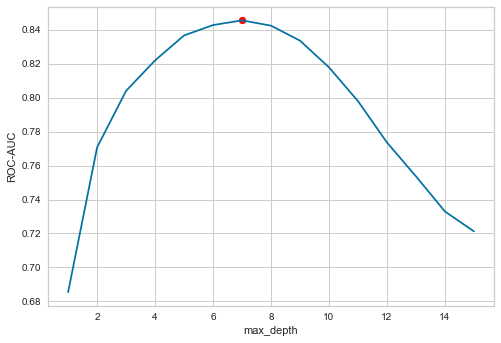

In [291]:
fig, ax = plt.subplots()

x_axis=[i for i in range(1,16)]
plt.plot(x_axis, tree_roc)
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')

ymax = max(tree_roc)
xpos = tree_roc.index(ymax)
xmax = x_axis[xpos]
plt.scatter(xmax,ymax, color='red')

In [472]:
from sklearn.ensemble import RandomForestClassifier

randomforest=RandomForestClassifier(max_depth=3, n_jobs=-1)
randomforest.fit(x_train, y_train)
cross_val_score(randomforest, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean()


0.8423244962413055

In [270]:
random_roc=[]
for i in range(1,30):
    randomforest=RandomForestClassifier(max_depth=i, n_jobs=-1)
    randomforest.fit(x_train, y_train)
    y_pred = randomforest.predict_proba(x_test)[:,1]
    random_roc.append(cross_val_score(randomforest, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean())

In [271]:
random_roc

[0.809845581759842,
 0.8320534716215665,
 0.8410473524887653,
 0.8473790421933252,
 0.8519350133695746,
 0.8569186556070006,
 0.8609707801261441,
 0.8647825392604853,
 0.8679392059999366,
 0.8709305690205852,
 0.8733175970983504,
 0.875949562952802,
 0.8780783116987292,
 0.8791093543957785,
 0.8811289242299685,
 0.882411238439212,
 0.8819492538213195,
 0.8832095989333002,
 0.883843419044118,
 0.8838400653395835,
 0.8839731609397011,
 0.8839047087193569,
 0.8838413384300392,
 0.8849389577065653,
 0.8844327810949197,
 0.884601917159625,
 0.8845154418448036,
 0.8842878487488498,
 0.8843851810167479]

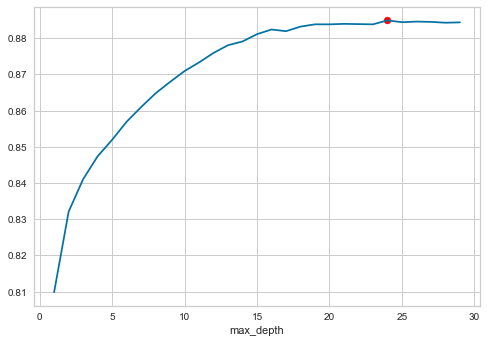

In [272]:
fig, ax = plt.subplots()

x_axis=[i for i in range(1,30)]
plt.plot(x_axis, random_roc)
plt.xlabel('max_depth')
ymax = max(random_roc)
xpos = random_roc.index(ymax)
xmax = x_axis[xpos]
plt.scatter(xmax,ymax, color='red')

In [274]:
random_roc=[]
for i in range(1,111,10):
    randomforest=RandomForestClassifier(n_estimators=i, n_jobs=-1)
    randomforest.fit(x_train, y_train)
    y_pred = randomforest.predict_proba(x_test)[:,1]
    random_roc.append(roc_auc_score(y_test, y_pred))

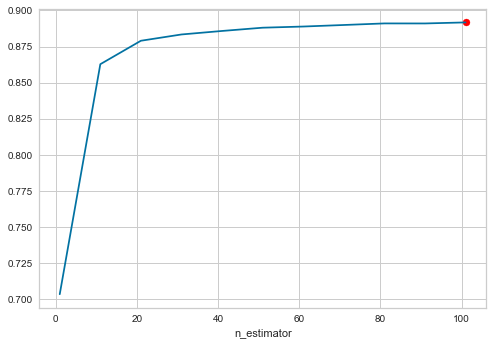

In [275]:
fig, ax = plt.subplots()

x_axis=[i for i in range(1,111,10)]
plt.plot(x_axis, random_roc)
plt.xlabel('n_estimator')
ymax = max(random_roc)
xpos = random_roc.index(ymax)
xmax = x_axis[xpos]
plt.scatter(xmax,ymax, color='red')

In [276]:
from lightgbm import LGBMClassifier

lgbm=LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict_proba(x_test)[:,1]
#print(roc_auc_score(y_test, y_pred))
#print(roc_auc_score(y_train, lgbm.predict(x_train)))
cross_val_score(lgbm, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc').mean()


0.8714431378220542

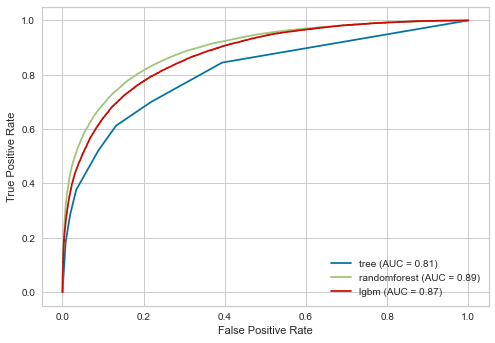

In [279]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

plot_roc_curve(tree, x_test, y_test, ax=ax, name='tree')
plot_roc_curve(randomforest, x_test, y_test, ax=ax, name='randomforest')
plot_roc_curve(lgbm, x_test, y_test, ax=ax, name='lgbm')

In [136]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
cross_val_score(tree, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')

array([0.80417898, 0.81548461, 0.81028429, 0.80605205, 0.81297147])

In [212]:
cross_val_score(tree, x_train, y_train, cv=KFold(n_splits=5), scoring='precision')

array([0.71538462, 0.74311295, 0.73842514, 0.70561653, 0.72973815])

In [210]:
cross_val_score(randomforest, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')

array([0.83624965, 0.84657919, 0.8418344 , 0.83457668, 0.84114599])

In [211]:
cross_val_score(lgbm, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')

array([0.87154485, 0.87725546, 0.87506283, 0.86815355, 0.87702294])

In [240]:
from pycaret.classification import *

In [241]:
exp_clf101 = setup(data = test, target = 'raintomorrow_Yes', session_id=123)

,Description,Value
0,session_id,123
1,Target,raintomorrow_Yes
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(137959, 18)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='raintomorrow_Yes',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

In [242]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8780,0.9057,0.5811,0.8107,0.6769,0.6042,0.6170,10.2030
et,Extra Trees Classifier,0.8779,0.9134,0.5750,0.8157,0.6744,0.6021,0.6161,9.1650
lightgbm,Light Gradient Boosting Machine,0.8567,0.8828,0.5220,0.7508,0.6157,0.5312,0.5445,3.9200
gbc,Gradient Boosting Classifier,0.8524,0.8716,0.4983,0.7465,0.5975,0.5115,0.5273,13.0900
lda,Linear Discriminant Analysis,0.8481,0.8656,0.5124,0.7162,0.5973,0.5068,0.5177,0.3760
ada,Ada Boost Classifier,0.8480,0.8609,0.4882,0.7317,0.5855,0.4969,0.5123,2.7800
lr,Logistic Regression,0.8476,0.8595,0.4888,0.7292,0.5852,0.4963,0.5112,14.2320
ridge,Ridge Classifier,0.8473,0.0000,0.4463,0.7607,0.5624,0.4775,0.5024,0.1500
knn,K Neighbors Classifier,0.8409,0.8261,0.5225,0.6798,0.5908,0.4941,0.5008,4.9970
qda,Quadratic Discriminant Analysis,0.8229,0.8341,0.5643,0.6043,0.5836,0.4713,0.4718,0.2130


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [244]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8784,0.9070,0.5967,0.8000,0.6836,0.6103,0.6203
1,0.8807,0.9152,0.5904,0.8164,0.6852,0.6140,0.6263
2,0.8765,0.9010,0.5678,0.8143,0.6691,0.5961,0.6107
3,0.8801,0.9094,0.5843,0.8186,0.6819,0.6105,0.6237
4,0.8804,0.9029,0.5800,0.8241,0.6809,0.6100,0.6242
5,0.8741,0.9057,0.5800,0.7918,0.6696,0.5941,0.6050
6,0.8809,0.9089,0.5951,0.8134,0.6873,0.6160,0.6274
7,0.8726,0.8998,0.5626,0.7988,0.6602,0.5847,0.5983
8,0.8766,0.9038,0.5683,0.8144,0.6694,0.5965,0.6111
9,0.8797,0.9030,0.5859,0.8153,0.6818,0.6101,0.6227


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [245]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8443,0.8486,0.4988,0.7071,0.5850,0.4926,0.5040
1,0.8458,0.8497,0.5085,0.7082,0.5919,0.5000,0.5105
2,0.8421,0.8418,0.4228,0.7502,0.5408,0.4543,0.4815
3,0.8443,0.8466,0.4440,0.7449,0.5563,0.4691,0.4922
4,0.8432,0.8438,0.4430,0.7398,0.5542,0.4662,0.4888
5,0.8379,0.8472,0.4364,0.7158,0.5423,0.4508,0.4711
6,0.8443,0.8473,0.4741,0.7224,0.5725,0.4822,0.4982
7,0.8402,0.8356,0.4661,0.7076,0.5620,0.4693,0.4846
8,0.8418,0.8363,0.4411,0.7332,0.5509,0.4619,0.4839
9,0.8435,0.8443,0.4518,0.7351,0.5596,0.4710,0.4916


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


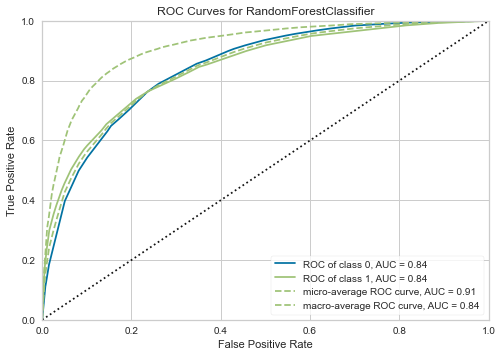

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [246]:
plot_model(tuned_rf, plot = 'auc')

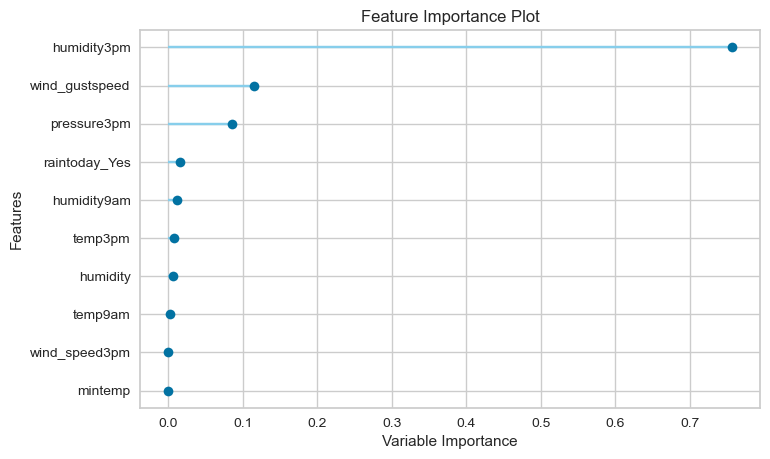

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [247]:
plot_model(tuned_rf, plot='feature')

In [248]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8405,0.8439,0.4558,0.7229,0.5591,0.4678,0.4863


In [284]:
from sklearn.pipeline import Pipeline

In [249]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()
model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [288]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [290]:
cross_val_score(model, x_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')

array([0.84219901, 0.84192028, 0.83422315, 0.83965375, 0.84296921])

In [287]:
pipeline = Pipeline(steps=['modeling', model])

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

# Objetivo

Meu cliente : Vendedor de guarda chuva / capa de chuva

# Tratamento de dados

## Rain Data

In [3]:
rain_data=pd.read_csv('data/rain_data_aus.csv')
rain_data

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195


In [4]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [5]:
rain_data['raintoday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
rain_data['raintoday']=np.where(rain_data['raintoday']=='Yes',1,rain_data['raintoday'])
rain_data['raintoday']=np.where(rain_data['raintoday']=='No',0,rain_data['raintoday'])
rain_data['raintomorrow']=np.where(rain_data['raintomorrow']=='Yes',1,rain_data['raintomorrow'])
rain_data['raintomorrow']=np.where(rain_data['raintomorrow']=='No',0,rain_data['raintomorrow'])
rain_data

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,0,0.0,0,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,0,0.0,0,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,0,0.0,0,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,0,1.0,0,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,0,0.2,0,40.76,41.600000,9,11.883546,0.220164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,9.4,20.9,0,0.0,0,28.16,34.400000,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,10.1,22.4,0,0.0,0,30.08,30.800000,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,10.9,24.5,0,0.0,0,32.36,27.200000,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,12.5,26.1,0,0.0,0,34.28,30.800000,12,0.985551,0.007195


## Wind Data

In [7]:
wind_data=pd.concat(
    [pd.read_csv('data/wind_table_01.csv'),pd.read_csv('data/wind_table_02.csv'),pd.read_csv('data/wind_table_03.csv'),pd.read_csv('data/wind_table_04.csv'),
    pd.read_csv('data/wind_table_05.csv'),pd.read_csv('data/wind_table_06.csv'),pd.read_csv('data/wind_table_07.csv'),pd.read_csv('data/wind_table_08.csv')])

In [8]:
wind_data['wind_gustdir']=np.where(wind_data['wind_gustdir'].isnull()==True,wind_data['windgustdir'],wind_data['wind_gustdir'])
wind_data['wind_gustspeed']=np.where(wind_data['wind_gustspeed'].isnull()==True,wind_data['windgustspeed'],wind_data['wind_gustspeed'])
wind_data['wind_dir9am']=np.where(wind_data['wind_dir9am'].isnull()==True,wind_data['winddir9am'],wind_data['wind_dir9am'])
wind_data['wind_dir3pm']=np.where(wind_data['wind_dir3pm'].isnull()==True,wind_data['winddir3pm'],wind_data['wind_dir3pm'])
wind_data['wind_speed9am']=np.where(wind_data['wind_speed9am'].isnull()==True,wind_data['windspeed9am'],wind_data['wind_speed9am'])
wind_data['wind_speed3pm']=np.where(wind_data['wind_speed3pm'].isnull()==True,wind_data['windspeed3pm'],wind_data['wind_speed3pm'])

In [9]:
wind_data

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,E,26.0,SE,SE,4.0,11.0,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,SE,15.0,SSE,E,7.0,6.0,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,SSW,20.0,WNW,SSW,6.0,6.0,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NW,50.0,NNW,NNW,17.0,28.0,NW,50.0,NNW,NNW,17.0,28.0


## Juntando duas tabelas (Rain Data, Wind Data)

In [10]:
df= pd.merge(left=rain_data, right=wind_data, on=['date','location'])

In [11]:
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,W,WNW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,NNW,WSW,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,W,WSW,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,SE,E,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,ENE,NW,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,SE,N,13.0,9.0,NNW,22.0,SE,N,13.0,9.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,SE,WNW,9.0,9.0,N,37.0,SE,WNW,9.0,9.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,SE,WNW,9.0,9.0,N,37.0,SE,WNW,9.0,9.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,SSE,N,13.0,7.0,SE,28.0,SSE,N,13.0,7.0


In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df.loc[(df['date'].dt.month>=3) & (df['date'].dt.month<=5),'season']=1 #fall
df.loc[(df['date'].dt.month>=6) & (df['date'].dt.month<=8),'season']=2 #winter
df.loc[(df['date'].dt.month>=9) & (df['date'].dt.month<=11),'season']=3 #spring
df.loc[(df['date'].dt.month==12) | (df['date'].dt.month==1) | (df['date'].dt.month==2),'season']=4 #summer
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,WNW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,WSW,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,WSW,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,E,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,NW,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,N,13.0,9.0,NNW,22.0,SE,N,13.0,9.0,2.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,WNW,9.0,9.0,N,37.0,SE,WNW,9.0,9.0,2.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,WNW,9.0,9.0,N,37.0,SE,WNW,9.0,9.0,2.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,N,13.0,7.0,SE,28.0,SSE,N,13.0,7.0,2.0


In [14]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [15]:
df['raintoday'] = pd.to_numeric(df['raintoday'])
df['raintomorrow'] = pd.to_numeric(df['raintomorrow'])

In [16]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'season'],
      dtype='object')

In [661]:
pd.get_dummies(df[['wind_gustdir','wind_gustspeed','wind_dir9am','wind_dir3pm','wind_speed9am','wind_speed3pm','raintomorrow']]).corr()[['raintomorrow']].sort_values(by='raintomorrow',ascending=False)

,raintomorrow
raintomorrow,1.000000
wind_gustspeed,0.237028
wind_speed9am,0.094347
wind_speed3pm,0.091011
wind_dir9am_N,0.061674
wind_dir9am_NNW,0.049926
wind_dir3pm_N,0.036482
wind_dir3pm_NW,0.034878
wind_gustdir_NW,0.034825
wind_gustdir_WNW,0.033798


In [17]:
df[['amountOfRain','rainfall','modelo_vigente','raintomorrow']].corr()[['raintomorrow']]

,raintomorrow
amountOfRain,0.503865
rainfall,0.236737
modelo_vigente,0.794319
raintomorrow,1.000000


Rainfall :  The amount of rainfall recorded for the day in mm

AmountOfRain :  The amount of rain in mm

In [18]:
df=df.drop(['date','location','amountOfRain','rainfall','modelo_vigente','wind_gustdir','wind_dir9am','wind_dir3pm','windgustdir','winddir9am','winddir3pm','windgustspeed','windspeed9am','windspeed3pm'],axis=1)
df

,mintemp,maxtemp,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,...,raintoday,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,13.4,22.9,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,...,0.0,0,29.48,28.400000,12,5.115360,44.0,20.0,24.0,4.0
1,7.4,25.1,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,...,0.0,0,32.12,2.208569,10,21.497100,44.0,4.0,22.0,4.0
2,12.9,25.7,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,...,0.0,0,32.84,38.000000,17,20.782859,46.0,19.0,26.0,4.0
3,9.2,28.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,...,0.0,0,35.60,21.200000,8,12.028646,24.0,11.0,9.0,4.0
4,17.5,32.3,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,...,0.0,0,40.76,41.600000,9,11.883546,41.0,7.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,3.6,25.3,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,...,0.0,0,32.36,27.200000,9,19.715976,22.0,13.0,9.0,2.0
164382,5.4,26.9,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,...,0.0,0,34.28,30.800000,12,0.985551,37.0,9.0,9.0,2.0
164383,5.4,26.9,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,...,0.0,0,34.28,30.800000,12,0.985551,37.0,9.0,9.0,2.0
164384,7.8,27.0,NaN,NaN,51.0,24.0,1019.4,1016.5,3.0,2.0,...,0.0,0,34.40,30.800000,15,4.381481,28.0,13.0,7.0,2.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   mintemp           163614 non-null  float64
 1   maxtemp           163989 non-null  float64
 2   evaporation       90128 non-null   float64
 3   sunshine          80607 non-null   float64
 4   humidity9am       162352 non-null  float64
 5   humidity3pm       159262 non-null  float64
 6   pressure9am       148085 non-null  float64
 7   pressure3pm       148113 non-null  float64
 8   cloud9am          100879 non-null  float64
 9   cloud3pm          95716 non-null   float64
 10  temp9am           163410 non-null  float64
 11  temp3pm           160309 non-null  float64
 12  raintoday         162767 non-null  float64
 13  raintomorrow      164386 non-null  int64  
 14  temp              163989 non-null  float64
 15  humidity          159262 non-null  float64
 16  precipitation3pm  16

In [20]:
df=df.drop_duplicates()

In [21]:
df.corr()[['raintomorrow']].sort_values(by='raintomorrow', ascending=False)[1:]

,raintomorrow
humidity3pm,0.446160
humidity,0.405600
cloud3pm,0.381870
cloud9am,0.317380
raintoday,0.313097
humidity9am,0.257161
wind_gustspeed,0.234010
wind_speed9am,0.090995
wind_speed3pm,0.087817
mintemp,0.083936


<AxesSubplot:>

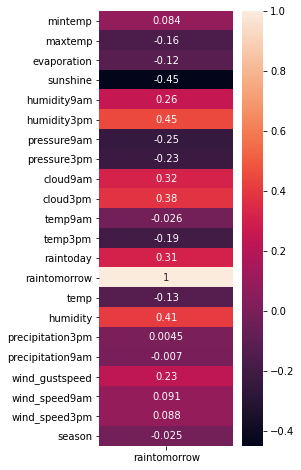

In [22]:
plt.figure(figsize = (3,8))
sns.heatmap(df.corr()[['raintomorrow']], annot = True)

In [23]:
df['sunshine'].value_counts()

0.0     2308
10.7    1087
11.0    1078
10.8    1058
10.5    1018
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: sunshine, Length: 145, dtype: int64

# Modelo

In [24]:
X=df.drop('raintomorrow', axis=1)
y=df['raintomorrow']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_std_train = scaler.transform(imputer.transform(X_train))

In [28]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=4, n_estimators=70)

In [29]:
from sklearn.model_selection import cross_val_score, KFold

cross_val_score(lgbm, X_std_train, y_train, scoring='roc_auc', cv=KFold(5))

array([0.8705306 , 0.87030213, 0.86823924, 0.87409391, 0.87436698])

In [30]:
strategy_test=['mean','median','most_frequent','constant']
strategy_score=[]
for i in strategy_test:
    imputer = SimpleImputer(strategy=i)
    imputer.fit(X_train)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_std_train = scaler.transform(imputer.transform(X_train))
    lgbm=LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
    lgbm.fit(X_train, y_train)
    strategy_score.append(cross_val_score(lgbm, X_std_train, y_train, scoring='roc_auc', cv=KFold(5)).mean())

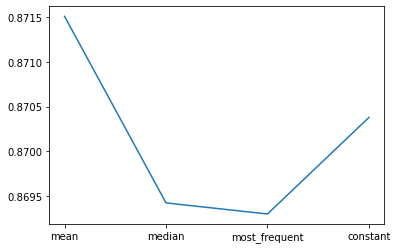

In [33]:
fig, ax = plt.subplots()
plt.plot(strategy_test,strategy_score)

#imputer strategy mean apresenta maior ROC

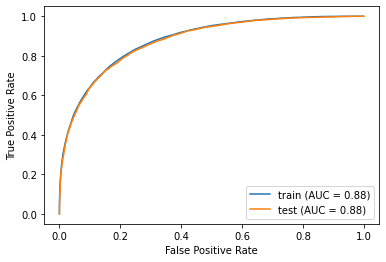

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train, y_train, ax=ax, name='train')
plot_roc_curve(lgbm, X_test, y_test, ax=ax, name='test')

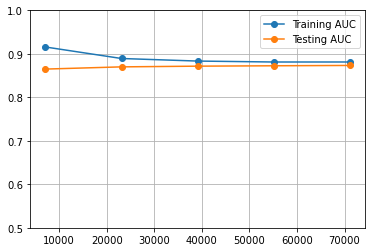

In [37]:
from sklearn.model_selection import learning_curve

curves = learning_curve(lgbm, X_train, y_train, cv=KFold(n_splits=3, shuffle=True), scoring=('roc_auc'))

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Testing AUC')
plt.grid()
plt.ylim([0.5, 1])
plt.legend()

In [38]:
df['raintomorrow'].value_counts().sum()

142193

In [39]:
4000/142193*100

2.4614432496677052

através da curva de aprendizagem, precisa corrigir teste_size para 2.5%

## Feature Selection

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

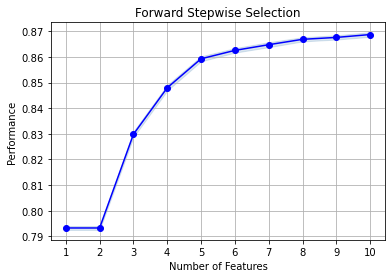

In [41]:
selector = SFS(lgbm, k_features=10, scoring='roc_auc')
selector.fit(X_std_train, y_train)

fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Forward Stepwise Selection')
plt.grid()
plt.show()

In [42]:
selector.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.79453943, 0.79301752, 0.79299912, 0.79068294, 0.79502184]),
  'avg_score': 0.7932521676188115,
  'feature_names': ('5',),
  'ci_bound': 0.001949988109162614,
  'std_dev': 0.0015171569964336166,
  'std_err': 0.0007585784982168083},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.79453943, 0.79301752, 0.79299912, 0.79068294, 0.79502184]),
  'avg_score': 0.7932521676188115,
  'feature_names': ('5', '6'),
  'ci_bound': 0.001949988109162614,
  'std_dev': 0.0015171569964336166,
  'std_err': 0.0007585784982168083},
 3: {'feature_idx': (5, 6, 7),
  'cv_scores': array([0.83027449, 0.82880788, 0.82701062, 0.82940831, 0.8335554 ]),
  'avg_score': 0.829811340194737,
  'feature_names': ('5', '6', '7'),
  'ci_bound': 0.0027713387647373684,
  'std_dev': 0.0021561957104520822,
  'std_err': 0.0010780978552260411},
 4: {'feature_idx': (3, 5, 6, 7),
  'cv_scores': array([0.84878636, 0.84634493, 0.84499691, 0.84823856, 0.85148258]),
  'avg_score': 0.84

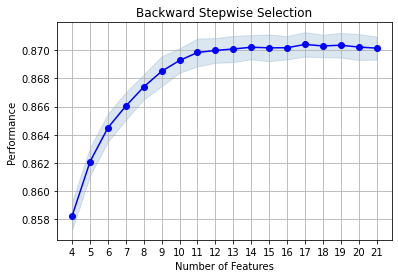

In [43]:
selector = SFS(lgbm, forward=False, k_features=4, scoring='roc_auc')
selector.fit(X_std_train, y_train)

fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Backward Stepwise Selection')
plt.grid()
plt.show()

In [44]:
selector.get_metric_dict()

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([0.8694251 , 0.86908519, 0.86809559, 0.8724287 , 0.87169398]),
  'avg_score': 0.8701457113092805,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20'),
  'ci_bound': 0.0021085134653444637,
  'std_dev': 0.0016404951091704713,
  'std_err': 0.0008202475545852356},
 20: {'feature_idx': (1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([0.86984284, 0.86918226, 0.86754576, 0.87246439, 0.87208527]),
  'avg_score': 0.8702241014342491,
  'feature_names': ('1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '

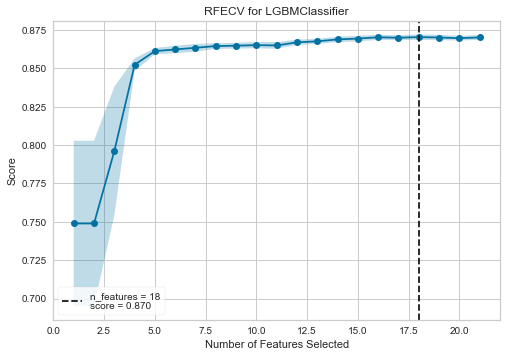

<AxesSubplot:title={'center':'RFECV for LGBMClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [45]:
from yellowbrick.features import RFECV

visualizer = RFECV(lgbm, scoring='roc_auc')

visualizer.fit(X_std_train, y_train)        
visualizer.show()

In [46]:
X_train.columns[visualizer.ranking_ == 1 ]

Index(['mintemp', 'maxtemp', 'evaporation', 'sunshine', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'temp', 'humidity', 'wind_gustspeed',
       'wind_speed9am', 'wind_speed3pm', 'season'],
      dtype='object')

### Corrigindo dados com os features selecionados

In [47]:
df_new=df[['mintemp', 'maxtemp', 'evaporation', 'sunshine', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'temp', 'humidity', 'wind_gustspeed',
       'wind_speed9am', 'wind_speed3pm', 'season','raintomorrow']]

In [48]:
X=df_new.drop('raintomorrow',axis=1)
y=df_new['raintomorrow']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_std_train = scaler.transform(imputer.transform(X_train))

lgbm=LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm.fit(X_train, y_train)

cross_val_score(lgbm, X_std_train, y_train, scoring='roc_auc', cv=KFold(5))

array([0.86993299, 0.86979602, 0.86755129, 0.87378971, 0.87430603])

## Utilizando Pycaret

In [114]:
from pycaret.classification import *
exp_clf101 = setup(data = df_new, target = 'raintomorrow', train_size = 0.75, session_id=123, feature_selection=True, normalize=True,
                   transformation=True, n_jobs=-1, numeric_imputation= 'mean')

,Description,Value
0,session_id,123
1,Target,raintomorrow
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(142193, 19)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [115]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8522,0.8778,0.5084,0.7524,0.6067,0.5199,0.5351,12.0360
lightgbm,Light Gradient Boosting Machine,0.8514,0.8808,0.5188,0.7412,0.6103,0.5220,0.5348,2.0780
et,Extra Trees Classifier,0.8495,0.8769,0.4951,0.7487,0.5960,0.5082,0.5246,11.4910
gbc,Gradient Boosting Classifier,0.8474,0.8701,0.4967,0.7373,0.5935,0.5039,0.5189,14.0400
lr,Logistic Regression,0.8424,0.8657,0.4944,0.7149,0.5845,0.4912,0.5040,6.0840
ada,Ada Boost Classifier,0.8419,0.8618,0.4885,0.7162,0.5807,0.4876,0.5012,3.0330
lda,Linear Discriminant Analysis,0.8405,0.8629,0.5087,0.6982,0.5885,0.4926,0.5022,0.4780
svm,SVM - Linear Kernel,0.8394,0.0000,0.4715,0.7170,0.5680,0.4746,0.4908,0.3310
ridge,Ridge Classifier,0.8394,0.0000,0.4415,0.7368,0.5521,0.4616,0.4841,0.1140
knn,K Neighbors Classifier,0.8360,0.8220,0.5019,0.6827,0.5785,0.4796,0.4883,44.4930


Como no caso do meu cliente FP é mais importante, preciso considerar precisão mais alto
(Eu previ e falei para meu cliente vendedor de guarda chuva que amanhã ia chover, então naquele dia o vendedor só levou os produtos de chuva para vender
mas aconteceu que não choveu. então o vendedor não conseguiu vender nada naquele dia)

In [116]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8555,0.8795,0.5084,0.7691,0.6121,0.5279,0.5449
1,0.8463,0.8738,0.4862,0.7394,0.5866,0.4971,0.5136
2,0.8485,0.8749,0.5029,0.7380,0.5982,0.5089,0.5232
3,0.8507,0.8780,0.5071,0.7460,0.6038,0.5159,0.5305
4,0.8525,0.8754,0.5159,0.7483,0.6107,0.5235,0.5373
5,0.8506,0.8723,0.4916,0.7572,0.5962,0.5096,0.5275
6,0.8547,0.8792,0.5142,0.7607,0.6136,0.5283,0.5436
7,0.8556,0.8833,0.5176,0.7623,0.6165,0.5316,0.5467
8,0.8517,0.8790,0.5077,0.7503,0.6056,0.5185,0.5335
9,0.8560,0.8826,0.5324,0.7528,0.6237,0.5379,0.5502


In [117]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8527,0.8810,0.5109,0.7529,0.6087,0.5221,0.5370
1,0.8472,0.8764,0.5038,0.7312,0.5965,0.5062,0.5195
2,0.8490,0.8793,0.5138,0.7333,0.6042,0.5145,0.5269
3,0.8505,0.8799,0.5138,0.7404,0.6066,0.5180,0.5312
4,0.8492,0.8798,0.5163,0.7325,0.6057,0.5159,0.5280
5,0.8497,0.8771,0.5025,0.7443,0.6000,0.5117,0.5266
6,0.8533,0.8822,0.5217,0.7482,0.6148,0.5277,0.5408
7,0.8565,0.8859,0.5380,0.7518,0.6272,0.5414,0.5530
8,0.8539,0.8808,0.5312,0.7440,0.6198,0.5325,0.5441
9,0.8523,0.8859,0.5362,0.7334,0.6195,0.5306,0.5406


In [118]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8399,0.8367,0.4331,0.7469,0.5483,0.4593,0.4845
1,0.8334,0.8317,0.4440,0.7038,0.5445,0.4488,0.4667
2,0.8349,0.8306,0.4603,0.7008,0.5556,0.4595,0.4749
3,0.8349,0.8319,0.4632,0.6991,0.5572,0.4608,0.4756
4,0.8361,0.8385,0.4574,0.7085,0.5559,0.4610,0.4777
5,0.8355,0.8275,0.4293,0.7253,0.5394,0.4472,0.4700
6,0.8370,0.8325,0.4013,0.7583,0.5249,0.4376,0.4699
7,0.8379,0.8380,0.4615,0.7146,0.5608,0.4670,0.4838
8,0.8427,0.8396,0.4705,0.7324,0.5730,0.4821,0.4999
9,0.8393,0.8392,0.4751,0.7122,0.5700,0.4760,0.4907


In [ ]:
tuned_lgbm = tune_model(lgbm)

In [119]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8397,0.8422,0.4767,0.7120,0.5710,0.4772,0.4917


Utilizando o modelo para teste deu AUC 0.8852

In [120]:
final_rf = finalize_model(tuned_rf)
final_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [121]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8394,0.8423,0.4522,0.7272,0.5576,0.4660,0.4856


Utilizando o modelo no dado incluindo teste/treino deu AUC 0.9247

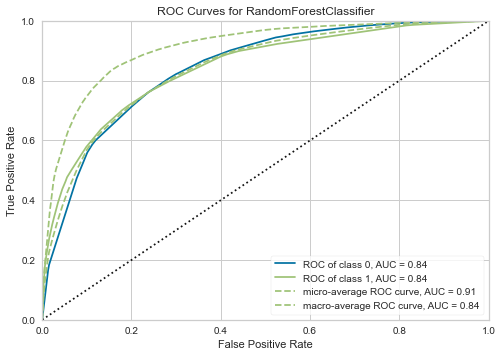

In [132]:
plot_model(tuned_rf, plot = 'auc')

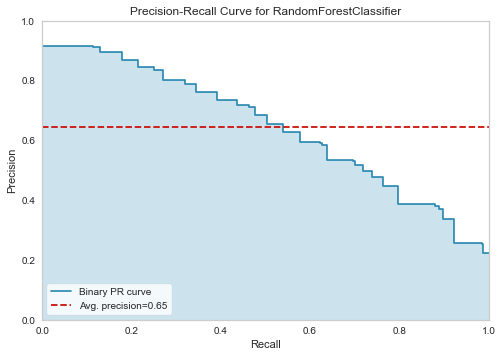

In [133]:
plot_model(tuned_rf, plot = 'pr')

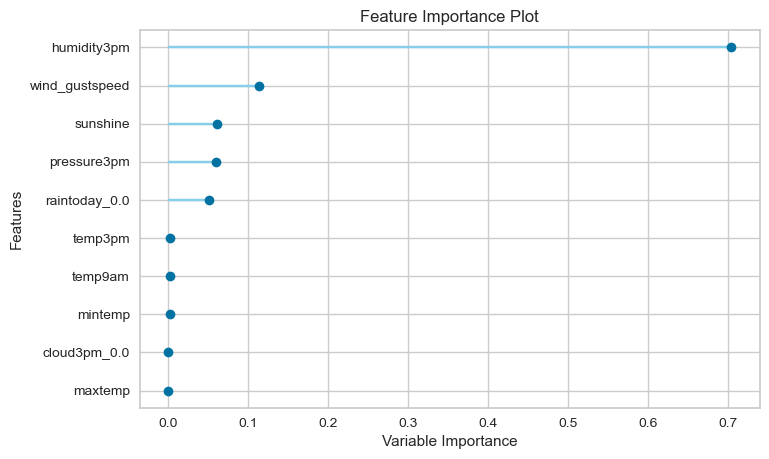

In [134]:
plot_model(tuned_rf, plot='feature')

In [135]:
df[['pressure9am','temp3pm','mintemp','raintomorrow']].corr()

,pressure9am,temp3pm,mintemp,raintomorrow
pressure9am,1.000000,-0.287301,-0.451260,-0.246371
temp3pm,-0.287301,1.000000,0.708865,-0.192424
mintemp,-0.451260,0.708865,1.000000,0.083936
raintomorrow,-0.246371,-0.192424,0.083936,1.000000


<AxesSubplot:xlabel='pressure9am', ylabel='count'>

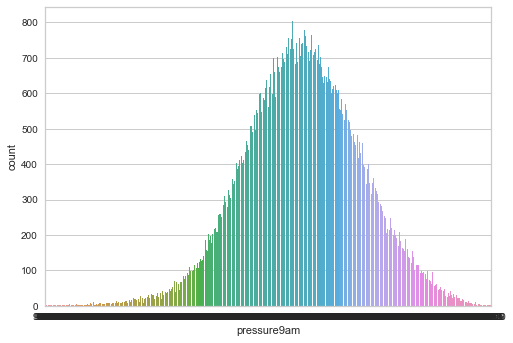

In [779]:
sns.countplot(df['pressure9am'])

<AxesSubplot:xlabel='mintemp', ylabel='count'>

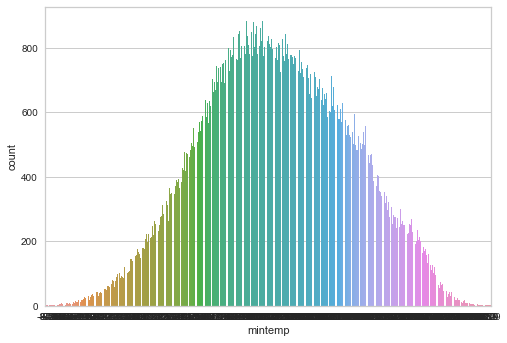

In [757]:
sns.countplot(df['mintemp'])

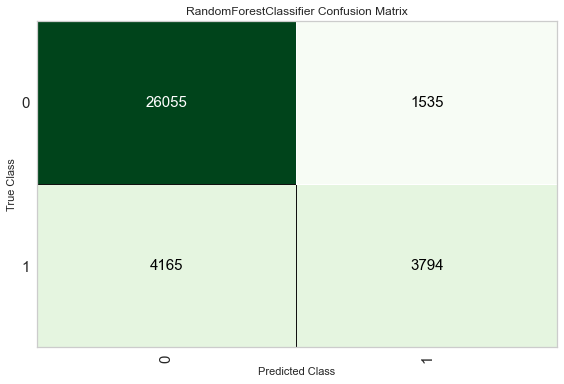

In [136]:
plot_model(tuned_rf, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

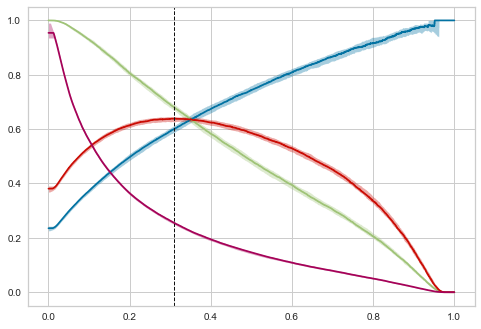

<Figure size 576x396 with 0 Axes>

In [65]:
evaluate_model(lgbm)

In [67]:
model=LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
scaler=StandardScaler()
imputer = SimpleImputer()

In [69]:
from sklearn.pipeline import Pipeline
dataprep= Pipeline(steps=[('scaler', scaler),
                         ('imputer', imputer)])

In [70]:
pipeline=Pipeline(steps=[('dataprep',dataprep),
                            ('model',model)])

In [71]:
pipeline.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


Pipeline(memory=None,
         steps=[('dataprep',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='mean', verbose=0))],
                          verbose=False)),
                ('model',
                 LGBMClassifier(bagging_fraction=0.7, bagging_freq=6,
                                boosting_type='gbdt',...,
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.1,
                                max_de

In [122]:
mintemp=[11.2,13.7,12.5,9.4,7.2,7.6,10.5,9.9,11.0,11.7,10.7]
maxtemp=[24.6,26,18.2,15.5,17.3,22.2,21.5,19.8,20.5,16.9,16.3]
evaporation=[5.4,6.4,6.8,4.6,0.8,2,2.4,2.8,0,3.8,2.8]
sunshine=[7.1,3.8,0.8,0.1,9.1,8.4,3.6,5.1,7.1,0.5,0.1]
humidity9am=[63,59,80,100,83,83,91,76,97,68,100]
humidity3pm=[35,36,74,78,52,56,37,69,45,56,71]
pressure9am=[1027.3,1023.3,1019.6,1019.9,1026,1021.6,1014.8,1013.9,1018.4,1010.2,1018.7]
pressure3pm=[1024.4,1018.9,1017.6,1021.5,1023.4,1016.8,1011.3,1013.4,1014.9,1007.6,1021.3]
cloud3pm=[7,2,7,8,5,1,6,7,3,7,7]
temp9am=[14.9,17.5,15,12,12.2,10.8,13.9,15.1,13.7,14.3,12.2]
temp3pm=[24.2,25.3,17,14.4,17,21.6,20.2,17.3,19.5,16.2,15.7]
raintoday=[0,0,0,1,0,0,0,0,0,0,1]
temp=[17.9, 19.85, 15.35, 12.45, 12.25, 14.89, 16.0, 14.85, 15.75, 14.29, 13.5]
humidity=[49.0, 47.5, 77.0, 89.0, 67.5, 69.5, 64.0, 72.5, 71.0, 62.0, 85.5]
wind_gustspeed=[33,39,28,39,30,19,15,24,28,41,41]
wind_speed9am=[9,7,7,0,0,6,7,4,0,19,9]
wind_speed3pm=[17,20,9,19,9,2,0,6,6,13,17]
season=[1,1,1,1,1,1,1,1,1,1,11]

In [123]:
australiaLmay=pd.DataFrame([mintemp, maxtemp,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud3pm,temp9am,
              temp3pm,raintoday,temp,humidity,wind_gustspeed,wind_speed9am,wind_speed3pm,season]).T

In [124]:
australiaLmay.columns=['mintemp','maxtemp','evaporation','sunshine','humidity9am','humidity3pm','pressure9am',
                        'pressure3pm','cloud3pm','temp9am','temp3pm','raintoday','temp','humidity','wind_gustspeed','wind_speed9am','wind_speed3pm','season']
australiaLmay

,mintemp,maxtemp,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud3pm,temp9am,temp3pm,raintoday,temp,humidity,wind_gustspeed,wind_speed9am,wind_speed3pm,season
0,11.2,24.6,5.4,7.1,63.0,35.0,1027.3,1024.4,7.0,14.9,24.2,0.0,17.90,49.0,33.0,9.0,17.0,1.0
1,13.7,26.0,6.4,3.8,59.0,36.0,1023.3,1018.9,2.0,17.5,25.3,0.0,19.85,47.5,39.0,7.0,20.0,1.0
2,12.5,18.2,6.8,0.8,80.0,74.0,1019.6,1017.6,7.0,15.0,17.0,0.0,15.35,77.0,28.0,7.0,9.0,1.0
3,9.4,15.5,4.6,0.1,100.0,78.0,1019.9,1021.5,8.0,12.0,14.4,1.0,12.45,89.0,39.0,0.0,19.0,1.0
4,7.2,17.3,0.8,9.1,83.0,52.0,1026.0,1023.4,5.0,12.2,17.0,0.0,12.25,67.5,30.0,0.0,9.0,1.0
5,7.6,22.2,2.0,8.4,83.0,56.0,1021.6,1016.8,1.0,10.8,21.6,0.0,14.89,69.5,19.0,6.0,2.0,1.0
6,10.5,21.5,2.4,3.6,91.0,37.0,1014.8,1011.3,6.0,13.9,20.2,0.0,16.00,64.0,15.0,7.0,0.0,1.0
7,9.9,19.8,2.8,5.1,76.0,69.0,1013.9,1013.4,7.0,15.1,17.3,0.0,14.85,72.5,24.0,4.0,6.0,1.0
8,11.0,20.5,0.0,7.1,97.0,45.0,1018.4,1014.9,3.0,13.7,19.5,0.0,15.75,71.0,28.0,0.0,6.0,1.0
9,11.7,16.9,3.8,0.5,68.0,56.0,1010.2,1007.6,7.0,14.3,16.2,0.0,14.29,62.0,41.0,19.0,13.0,1.0


In [125]:
australiaLmay.columns=X_test.columns

In [111]:
X_test

,mintemp,maxtemp,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud3pm,temp9am,temp3pm,raintoday,temp,humidity,wind_gustspeed,wind_speed9am,wind_speed3pm,season
128002,4.0,18.8,NaN,NaN,66.0,59.0,1030.2,1026.4,NaN,14.5,17.8,0.0,24.560000,3.633335,24.0,7.0,13.0,3.0
151820,8.5,17.5,NaN,NaN,83.0,77.0,NaN,NaN,8.0,13.3,15.0,0.0,23.000000,94.400000,39.0,9.0,22.0,3.0
36798,17.9,25.6,11.0,12.3,57.0,52.0,1016.4,1013.7,4.0,22.9,24.2,0.0,32.720000,64.400000,35.0,2.0,28.0,4.0
20244,18.0,29.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,23.0,NaN,0.0,36.800000,NaN,NaN,9.0,NaN,1.0
141962,12.6,23.1,NaN,NaN,86.0,60.0,NaN,NaN,NaN,17.5,22.1,0.0,2.143443,74.000000,33.0,13.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96623,20.7,29.3,10.4,10.6,62.0,55.0,1018.3,1015.6,1.0,25.0,27.4,0.0,37.160000,68.000000,24.0,6.0,13.0,4.0
148149,7.9,18.5,2.0,9.9,74.0,63.0,1023.5,1020.0,NaN,10.7,17.3,0.0,24.200000,77.600000,26.0,17.0,13.0,1.0
59221,-1.2,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.040000,NaN,65.0,24.0,20.0,2.0
36102,20.3,28.3,12.6,13.0,51.0,45.0,1014.9,1012.0,1.0,24.7,27.2,0.0,35.960000,56.000000,44.0,17.0,26.0,4.0


In [126]:
unseen_predictions = predict_model(final_rf, data=australiaLmay)
unseen_predictions.head()

,mintemp,maxtemp,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud3pm,temp9am,temp3pm,raintoday,temp,humidity,wind_gustspeed,wind_speed9am,wind_speed3pm,season,Label,Score
0,11.2,24.6,5.4,7.1,63.0,35.0,1027.3,1024.4,7.0,14.9,24.2,0.0,17.90,49.0,33.0,9.0,17.0,1.0,0,0.9332
1,13.7,26.0,6.4,3.8,59.0,36.0,1023.3,1018.9,2.0,17.5,25.3,0.0,19.85,47.5,39.0,7.0,20.0,1.0,0,0.8444
2,12.5,18.2,6.8,0.8,80.0,74.0,1019.6,1017.6,7.0,15.0,17.0,0.0,15.35,77.0,28.0,7.0,9.0,1.0,0,0.6923
3,9.4,15.5,4.6,0.1,100.0,78.0,1019.9,1021.5,8.0,12.0,14.4,1.0,12.45,89.0,39.0,0.0,19.0,1.0,0,0.6205
4,7.2,17.3,0.8,9.1,83.0,52.0,1026.0,1023.4,5.0,12.2,17.0,0.0,12.25,67.5,30.0,0.0,9.0,1.0,0,0.9212


In [140]:
resultado=unseen_predictions[['raintoday','Label']]
resultado=resultado.rename({'Label':'raintomorrow_predict'},axis=1)

In [142]:
resultado.index=['1/5','2/5','3/5','4/5','5/5','6/5','7/5','8/5','9/5','10/5','11/5']

In [147]:
resultado['raintoday']=np.where(resultado['raintoday']==0,'No','Yes')
resultado['raintomorrow_predict']=np.where(resultado['raintomorrow_predict']==0,'No','Yes')

In [148]:
resultado

,raintoday,raintomorrow_predict
1/5,No,No
2/5,No,No
3/5,No,No
4/5,Yes,No
5/5,No,No
6/5,No,No
7/5,No,No
8/5,No,No
9/5,No,No
10/5,No,No


In [ ]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(1,1, figsize=(15,8))

plot_partial_dependence(model, 
                        scaler.transform(X_test), 
                        features=X_train.columns, 
                        feature_names=X_train.columns,
                        grid_resolution=100, fig = fig)

In [782]:
test = setup(data = df, target = 'raintomorrow', train_size = 0.75, session_id=123, feature_selection=True, n_jobs=-1)

,Description,Value
0,session_id,123
1,Target,raintomorrow
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(142193, 25)"
5,Missing Values,True
6,Numeric Features,21
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='raintomorrow',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('fix_perfect', Remove_100(target='raintomorrow')),
                ('clean_names', Clean_Colum_Names()),
              

In [783]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8521,0.8761,0.4996,0.7585,0.6023,0.5162,0.5332,12.2920
lightgbm,Light Gradient Boosting Machine,0.8515,0.8808,0.5202,0.7406,0.6110,0.5227,0.5352,5.7180
et,Extra Trees Classifier,0.8501,0.8749,0.4890,0.7567,0.5940,0.5073,0.5255,15.7430
gbc,Gradient Boosting Classifier,0.8474,0.8700,0.4967,0.7372,0.5934,0.5039,0.5188,18.8430
ada,Ada Boost Classifier,0.8417,0.8618,0.4869,0.7165,0.5798,0.4866,0.5004,4.0420
lda,Linear Discriminant Analysis,0.8411,0.8633,0.5083,0.7010,0.5892,0.4938,0.5036,0.8710
ridge,Ridge Classifier,0.8403,0.0000,0.4434,0.7402,0.5545,0.4646,0.4873,0.6060
lr,Logistic Regression,0.8395,0.8577,0.4774,0.7123,0.5716,0.4776,0.4921,15.5200
knn,K Neighbors Classifier,0.8292,0.8022,0.4819,0.6645,0.5586,0.4560,0.4651,27.3950
svm,SVM - Linear Kernel,0.7959,0.0000,0.5495,0.6478,0.5184,0.4047,0.4466,5.4210


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [784]:
test2 = setup(data = df, target = 'raintomorrow', train_size = 0.7, session_id=123, feature_selection=True, n_jobs=-1)

,Description,Value
0,session_id,123
1,Target,raintomorrow
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(142193, 25)"
5,Missing Values,True
6,Numeric Features,21
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='raintomorrow',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('fix_perfect', Remove_100(target='raintomorrow')),
                ('clean_names', Clean_Colum_Names()),
              

In [785]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8521,0.8801,0.5207,0.7435,0.6124,0.5245,0.5373,5.4130
rf,Random Forest Classifier,0.8512,0.8750,0.4979,0.7558,0.6003,0.5136,0.5305,14.2260
et,Extra Trees Classifier,0.8491,0.8742,0.4843,0.7553,0.5901,0.5030,0.5217,20.2790
gbc,Gradient Boosting Classifier,0.8469,0.8696,0.4952,0.7363,0.5921,0.5023,0.5173,31.7230
ada,Ada Boost Classifier,0.8421,0.8611,0.4878,0.7183,0.5809,0.4880,0.5019,3.9400
lda,Linear Discriminant Analysis,0.8411,0.8630,0.5086,0.7014,0.5896,0.4942,0.5040,1.5870
ridge,Ridge Classifier,0.8401,0.0000,0.4435,0.7400,0.5545,0.4645,0.4872,0.2550
lr,Logistic Regression,0.8398,0.8576,0.4775,0.7142,0.5723,0.4785,0.4932,27.6810
knn,K Neighbors Classifier,0.8289,0.8007,0.4820,0.6636,0.5583,0.4555,0.4645,32.7580
dt,Decision Tree Classifier,0.7812,0.6921,0.5306,0.5120,0.5210,0.3793,0.3795,1.2710


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(model, scoring='roc_auc')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [625]:
pipeline = Pipeline(steps=[(tor),
                            ('scaler', StandardScaler()),
                           ('imputer', SimpleImputer()),
                           ('model', LGBMClassifier())])

In [622]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [603]:
from sklearn.model_selection import GridSearchCV

In [628]:
parameters = {'imputer__strategy': ['mean','median'],
              'model__boosting_type': ['gbdt','dart','goss','rf'],
              'model__num_leaves': [4, 8, 16],
              'model__max_depth': [2,3,4],
              'model__learning_rate': [0.01, 0.1,],
              'model__n_estimators': [30, 50, 100],
              'model__colsample_bytree': [0.8, 0.9],
              'model__reg_alpha': [0, 0.1, 0.5],
              'model__reg_lambda': [0, 0.1, 0.5],
             }

In [629]:
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 83.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('model',
                                        LGBMClassifier(boosting_type='gbdt

In [630]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('model',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=0.8, importance_type='split',
                                learning_rate=0.1, max_depth=4,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=16, objective=None,
                                random_state=None, reg_alpha=0, reg_lambda=0.5,
                                silent=True, subsample=1.0,
                                subsample_for_bin=2

In [631]:
grid_search.best_params_

{'imputer__strategy': 'mean',
 'model__boosting_type': 'gbdt',
 'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 100,
 'model__num_leaves': 16,
 'model__reg_alpha': 0,
 'model__reg_lambda': 0.5}

In [632]:
grid_search.best_score_

0.8737487699421572